# Analysis of 2015 CCHRC Air Source Heat Pump Study Data

In [1]:
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
# import matplotlib pyplot commands
from matplotlib.pyplot import *
# Show Plots in the Notebook
%matplotlib inline
 
# 'style' the plot like fivethirtyeight.com website
style.use('bmh')

In [2]:
rcParams['figure.figsize']= (9, 6)   # set Chart Size
rcParams['font.size'] = 14            # set Font size in Chart

In [3]:
fn = 'data/Dillingham_DLG_DHP_TenSecond.dat'
# Take a look at the header rows
f = open(fn)
for i in range(5):
    print(f'Line {i}: {f.readline().strip()}')

Line 0: "TOA5","Dillingham","CR1000","27206","CR1000.Std.27","CPU:ASHP DHP 2014.CR1","34100","DLG_DHP_TenSecond"
Line 1: "TIMESTAMP","RECORD","DLG_DeliveryT1_F","DLG_DeliveryT2_F","DLG_DeliveryT3_F","DLG_ReturnT1_F","DLG_ReturnT2_F","DLG_ReturnT3_F","DLG_CoilT_F","DLG_OutsideT_F","DLG_Electricity_W_Avg","DLG_Airflow_fpm_Avg"
Line 2: "TS","RN","","","","","","","","","",""
Line 3: "","","Smp","Smp","Smp","Smp","Smp","Smp","Smp","Smp","Avg","Avg"
Line 4: "2014-10-04 18:03:20",0,49.86922,49.72235,49.672,49.88553,49.8515,49.86922,30.51785,30.51633,"NAN",0.1071669


In [4]:
dfd = pd.read_csv(fn, skiprows=[0, 2, 3], parse_dates=['TIMESTAMP'], na_values=['NAN'])
dfd.head()

,TIMESTAMP,RECORD,DLG_DeliveryT1_F,DLG_DeliveryT2_F,DLG_DeliveryT3_F,DLG_ReturnT1_F,DLG_ReturnT2_F,DLG_ReturnT3_F,DLG_CoilT_F,DLG_OutsideT_F,DLG_Electricity_W_Avg,DLG_Airflow_fpm_Avg
0,2014-10-04 18:03:20,0,49.86922,49.72235,49.67200,49.88553,49.85150,49.86922,30.51785,30.51633,NaN,0.107167
1,2014-10-04 18:03:30,1,66.49229,66.29536,66.22681,66.50751,66.45961,66.48685,40.68156,40.71555,NaN,0.107660
2,2014-10-04 18:03:40,2,66.49229,66.28444,66.23115,66.50316,66.45311,66.48466,40.70706,40.77493,NaN,0.106630
3,2014-10-04 18:03:50,3,66.48685,66.27574,66.23115,66.50208,66.44226,66.47047,40.71556,40.72401,NaN,0.105903
4,2014-10-04 18:04:00,4,66.49120,66.27900,66.23115,66.49229,66.43791,66.46939,40.69735,40.64272,NaN,0.107903


In [5]:
dfd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1819915 entries, 0 to 1819914
Data columns (total 12 columns):
TIMESTAMP                datetime64[ns]
RECORD                   int64
DLG_DeliveryT1_F         float64
DLG_DeliveryT2_F         float64
DLG_DeliveryT3_F         float64
DLG_ReturnT1_F           float64
DLG_ReturnT2_F           float64
DLG_ReturnT3_F           float64
DLG_CoilT_F              float64
DLG_OutsideT_F           float64
DLG_Electricity_W_Avg    float64
DLG_Airflow_fpm_Avg      float64
dtypes: datetime64[ns](1), float64(10), int64(1)
memory usage: 166.6 MB


In [6]:
# Calculate average delivery and return temperatures, and clean up DataFrame
# renaming columns to shorter names.
dfd['t_delivery'] = (dfd.DLG_DeliveryT1_F + dfd.DLG_DeliveryT2_F + dfd.DLG_DeliveryT3_F) / 3.0
dfd['t_return'] = (dfd.DLG_ReturnT1_F + dfd.DLG_ReturnT2_F + dfd.DLG_ReturnT3_F) / 3.0
dfd.drop(columns=['RECORD', 'DLG_DeliveryT1_F', 'DLG_DeliveryT2_F', 'DLG_DeliveryT3_F', 'DLG_ReturnT1_F', 'DLG_ReturnT2_F', 'DLG_ReturnT3_F'], inplace=True)
dfd.rename(columns={
    'DLG_CoilT_F': 't_coil',
    'DLG_OutsideT_F': 't_out',
    'DLG_Electricity_W_Avg': 'power',
    'DLG_Airflow_fpm_Avg': 'airspeed',
    'TIMESTAMP': 'ts',
}, inplace=True)
dfd.set_index('ts', inplace=True)
dfd.describe()

,t_coil,t_out,power,airspeed,t_delivery,t_return
count,1.819915e+06,1.819915e+06,1.818550e+06,1.819674e+06,1.819915e+06,1.819915e+06
mean,2.897679e+01,2.890385e+01,1.150438e+02,1.226483e+01,6.938441e+01,6.660027e+01
std,1.105391e+01,1.090487e+01,3.968522e+02,3.794369e+01,1.444734e+01,4.193026e+00
min,-1.676911e+01,-1.211544e+01,-6.378184e+00,-9.511621e+00,1.628906e+01,1.641421e+01
25%,2.344835e+01,2.335494e+01,4.890676e+00,1.820209e-01,6.417661e+01,6.443917e+01
50%,3.154517e+01,3.124205e+01,5.214241e+00,2.004053e-01,6.547210e+01,6.567928e+01
75%,3.629568e+01,3.633908e+01,5.610726e+00,2.932821e-01,6.723580e+01,6.751149e+01
max,1.203533e+02,6.334097e+01,2.394634e+03,4.978166e+02,1.436833e+02,1.018910e+02


Average Delivery delta-T when Off: -0.29


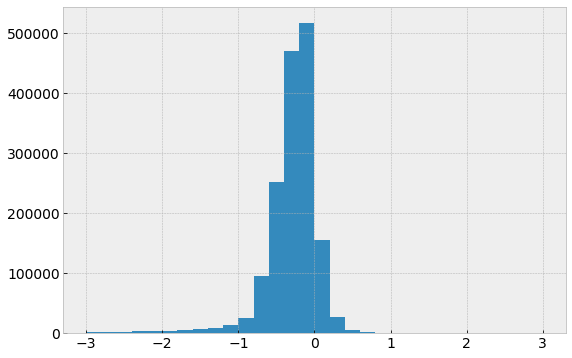

In [7]:
# Check calibration of Delivery and Return Temp Sensors.
# They should be pretty close to each other when heat pump is off.
df_off = dfd.query('power < 100')
delta_t = df_off.t_delivery - df_off.t_return
# also knock out large delta-T's
delta_t = delta_t.where(np.abs(delta_t) < 3)
print(f'Average Delivery delta-T when Off: {delta_t.mean():.2f}')
delta_t.hist(bins=30)

In [8]:
# How important is accurate delta-T?  What is the average delta-T
# when the unit is On?
df_on = dfd.query('power >= 100')
delta_t = df_on.t_delivery - df_on.t_return
print(delta_t.mean())

# About 38 deg delta-T.  So inaccuracy of 0.3 out of 38 F is about
# 1%.  No big deal if you are looking at the COP just during the On
# periods.

38.03481030971885


In [9]:
# Function to average or some 'interval_string' time period,
# and then plot Power against outdoor temperature.
def plot_avg_power(df, interval_string):
    df_avg = df.resample(interval_string).mean()
    df_avg.plot(x='t_out', y='power', kind='scatter')

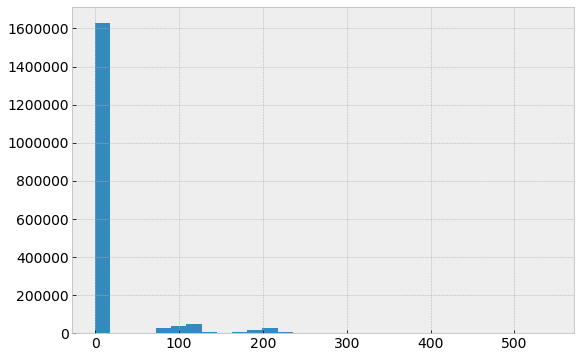

In [10]:
# Compute Air Flow in CFM from calibration data
airflow = 1.0566 * dfd.airspeed + 18.333         # Air flow in cfm from proxy calibration
nonzero_speed = (dfd.airspeed > 40)              # Speed less than 40 fpm counts as zero speed
dfd['airflow'] = airflow * nonzero_speed         # Zero speed means zero flow
dfd.airflow.hist(bins=30)

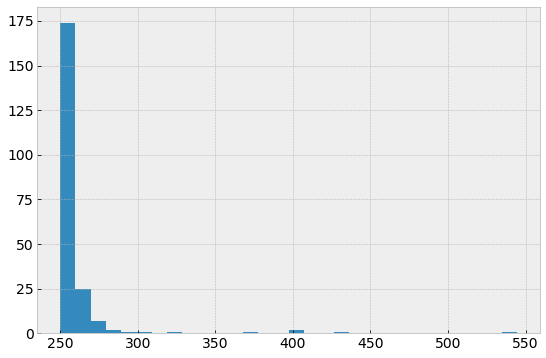

In [11]:
# Look like there may be some outliers
dfd.query('airflow > 250').airflow.hist(bins=30)

Text(0,0.5,'# of Samples')

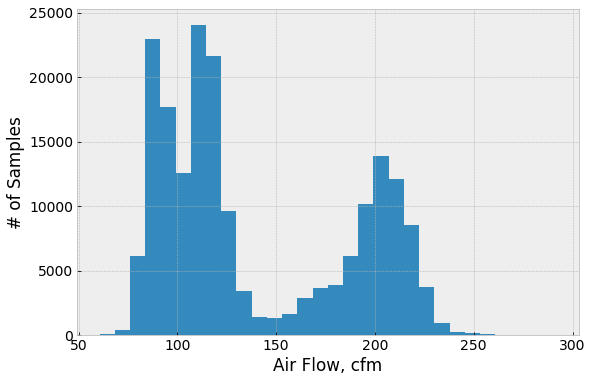

In [12]:
# Substitute NaN for values over 300
dfd['airflow'] = dfd.airflow.where(dfd.airflow < 300)
dfd.query('airflow > 0').airflow.hist(bins=30)
xlabel('Air Flow, cfm')
ylabel('# of Samples')

In [13]:
# Calculate Heat Output in Watts

# Constants:
c_p = 0.240 # Specific heat of air in Btu/lb-F
ro = 0.0749   # Density of air (in lb/ft^3) at standard conditions
VHC = c_p*ro  # Volumetric heat capacity of air in Btu/ft^3-F

dfd['heat_out'] = dfd.airflow * (dfd.t_delivery - dfd.t_return) * VHC * 60 / 3.412

# Eliminate the coil temp column
dfd2 = dfd.drop(columns=['t_coil'])

# drop the rows that have one or more NaNs
dfd2.dropna(inplace=True)

dfd2.describe()
# Looking at the overall mean power and heat_out, COP is 1.39 for the
# entire period, counting periods when the heat pump is Off.

,t_out,power,airspeed,t_delivery,t_return,airflow,heat_out
count,1.818302e+06,1.818302e+06,1.818302e+06,1.818302e+06,1.818302e+06,1.818302e+06,1.818302e+06
mean,2.890040e+01,1.150540e+02,1.226947e+01,6.938633e+01,6.660027e+01,1.454504e+01,1.593716e+02
std,1.090656e+01,3.968731e+02,3.794456e+01,1.445126e+01,4.193890e+00,4.539843e+01,6.039727e+02
min,-1.211544e+01,-6.378184e+00,-8.598010e-01,1.628906e+01,1.641421e+01,0.000000e+00,-1.130452e+03
25%,2.335200e+01,4.890689e+00,1.820817e-01,6.417654e+01,6.443862e+01,0.000000e+00,-0.000000e+00
50%,3.123535e+01,5.214249e+00,2.004225e-01,6.547210e+01,6.567888e+01,0.000000e+00,-0.000000e+00
75%,3.634174e+01,5.610741e+00,2.932770e-01,6.723584e+01,6.751153e+01,0.000000e+00,-0.000000e+00
max,6.334097e+01,2.394634e+03,2.586901e+02,1.436833e+02,1.018910e+02,2.916650e+02,4.153383e+03


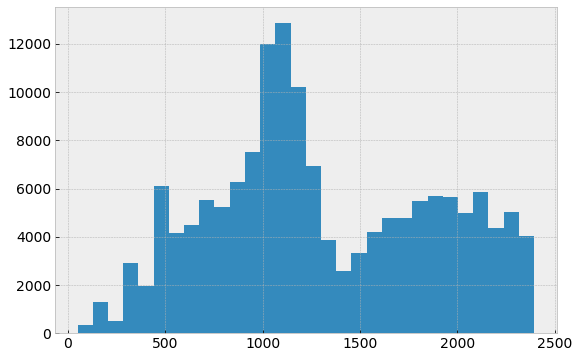

In [14]:
dfd2.query('power > 50').power.hist(bins=30)

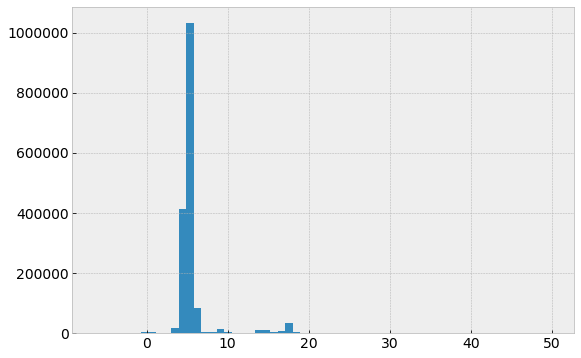

In [15]:
# Look at Power Consumption when the heat pump is essentially off
dfd2.query('power <= 50').power.hist(bins=60)

In [16]:
dfd2.query('airspeed > 40').head()

,t_out,power,airspeed,t_delivery,t_return,airflow,heat_out
ts,,,,,,,
2014-10-04 18:17:00,40.13540,20.01131,81.48087,66.274317,66.317117,104.425687,-1.412819
2014-10-04 18:17:10,40.17805,19.02945,79.31525,66.322180,66.285550,102.137493,1.182653
2014-10-04 18:17:20,40.07320,52.37772,73.07473,66.314917,66.271403,95.543760,1.314195
2014-10-04 18:17:30,40.00608,295.97850,76.00609,66.260883,66.251100,98.641035,0.305056
2014-10-04 18:17:40,40.01583,406.67120,77.21709,64.986887,66.165847,99.920577,-37.238252


In [17]:
dfd2.describe()

,t_out,power,airspeed,t_delivery,t_return,airflow,heat_out
count,1.818302e+06,1.818302e+06,1.818302e+06,1.818302e+06,1.818302e+06,1.818302e+06,1.818302e+06
mean,2.890040e+01,1.150540e+02,1.226947e+01,6.938633e+01,6.660027e+01,1.454504e+01,1.593716e+02
std,1.090656e+01,3.968731e+02,3.794456e+01,1.445126e+01,4.193890e+00,4.539843e+01,6.039727e+02
min,-1.211544e+01,-6.378184e+00,-8.598010e-01,1.628906e+01,1.641421e+01,0.000000e+00,-1.130452e+03
25%,2.335200e+01,4.890689e+00,1.820817e-01,6.417654e+01,6.443862e+01,0.000000e+00,-0.000000e+00
50%,3.123535e+01,5.214249e+00,2.004225e-01,6.547210e+01,6.567888e+01,0.000000e+00,-0.000000e+00
75%,3.634174e+01,5.610741e+00,2.932770e-01,6.723584e+01,6.751153e+01,0.000000e+00,-0.000000e+00
max,6.334097e+01,2.394634e+03,2.586901e+02,1.436833e+02,1.018910e+02,2.916650e+02,4.153383e+03


In [18]:
# Function to average or some 'interval_string' time period,
# and then plot Power against outdoor temperature.
def plot_avg_power(df, interval_string):
    df_avg = df.resample(interval_string).mean()
    df_avg.plot(x='t_out', y='power', kind='scatter')

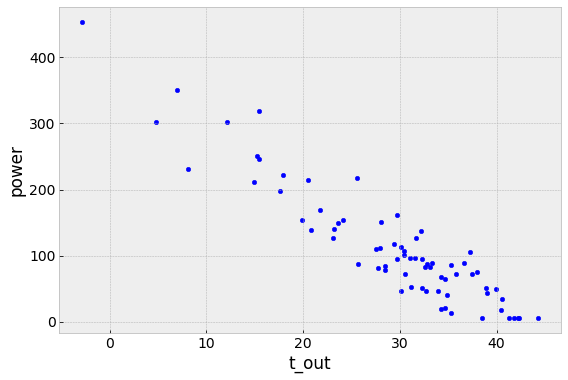

In [19]:
# Experiment with different averaging intervals to see where the data settles down.
plot_avg_power(dfd2, '3D')

(0, 2.5)

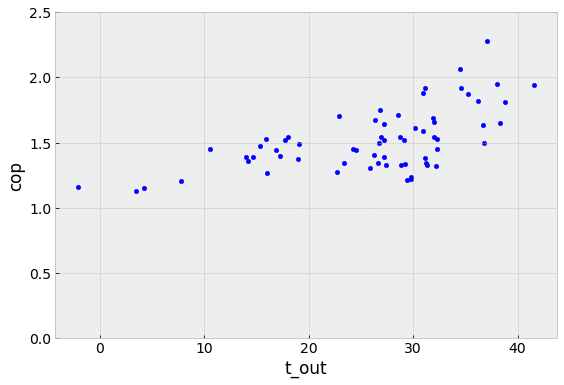

In [20]:
# Do 3 day averages and compute COP for those intervals
# Look at filtering out the low power readings so that the COP
# only considers time periods when the heat pump is running.  Tom
# had it scheduled to only run once or twice a day.
power_threshold = 100   # Watts required to consider the unit running
dfd2_3day = dfd2.query('power >= @power_threshold').resample('3D').mean()
dfd2_3day['cop'] = dfd2_3day.heat_out / dfd2_3day.power
dfd2_3day.plot(x='t_out', y='cop', kind='scatter')
ylim(0, 2.5)

In [21]:
# Calculate seasonal average COP 
dfd2_mean = dfd2.query('power >= @power_threshold').mean()
dfd2_mean.heat_out / dfd2_mean.power

1.4430260716657675

In [22]:
# Date to start for the graph in the next cell.
dt = datetime(2014, 10, 5)

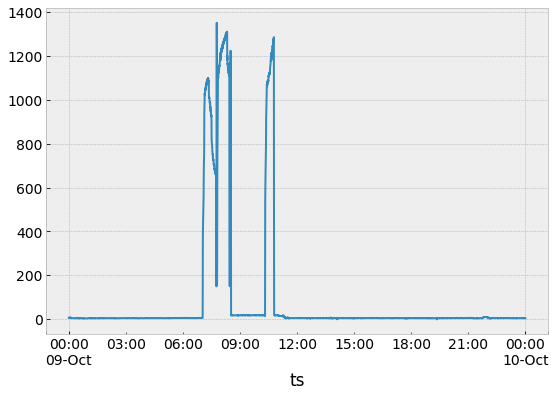

In [27]:
# Step through the days looking at the heat pump power consumption
# across the day.
dfd[dt.strftime('%Y-%m-%d')].power.plot()
dt += timedelta(days=1)